In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [95]:
df = pd.read_table('../raw-data/samples.tsv')
df.head()

,id,product_id,product,tags,triplicate_1_sample_id,triplicate_2_sample_id,lot_no,manufacturing_date,expiration_date,collected_on,...,DNHP_percent_tdi_70_kg_efsa,DCHP_percent_tdi_70_kg_efsa,DNOP_percent_tdi_70_kg_efsa,BPA_percent_tdi_70_kg_efsa,BPS_percent_tdi_70_kg_efsa,BPF_percent_tdi_70_kg_efsa,DEHT_percent_tdi_70_kg_efsa,DEHA_percent_tdi_70_kg_efsa,DINCH_percent_tdi_70_kg_efsa,DIDA_percent_tdi_70_kg_efsa
0,7090411,79,Ito En Oi Ocha Unsweetened Green Tea,"tea,beverages",NaN,NaN,4:49,NaN,2024-12-13,2024-07-09,...,NO TDI,NO TDI,NO TDI,<LOQ,NO TDI,NO TDI,<LOQ,<LOQ,<LOQ,NO TDI
1,7091001,136,Whole Foods Non-Organic Broccoli,"produce,groceries,organic,vegetables",NaN,NaN,NaN,NaN,NaN,2024-07-09,...,NO TDI,NO TDI,NO TDI,<LOQ,NO TDI,NO TDI,0.006,<LOQ,<LOQ,NO TDI
2,7091002,8,Whole Foods Organic Broccoli,"produce,groceries,organic,vegetables",NaN,NaN,NaN,NaN,NaN,2024-07-09,...,NO TDI,NO TDI,NO TDI,<LOQ,NO TDI,NO TDI,0.008,<LOQ,<LOQ,NO TDI
3,7091201,26,Clover Organic Whole Milk in Whole Gallon Jug,"dairy,cow_milk,cow_milk_from_store,milk,organi...",NaN,NaN,08:15 PT9 SL 06499,NaN,2024-07-23,2024-07-09,...,NO TDI,NO TDI,NO TDI,<LOQ,NO TDI,NO TDI,0.03,<LOQ,<LOQ,NO TDI
4,7091202,27,Clover Organic Whole Milk in Half Gallon Carton,"dairy,carton,cow_milk,cow_milk_from_store,milk...",NaN,NaN,72 06-499,NaN,2024-08-27,2024-07-09,...,NO TDI,NO TDI,NO TDI,<LOQ,NO TDI,NO TDI,0.02,<LOQ,<LOQ,NO TDI


In [96]:
for x in df.columns:
    print(x)
    


id
product_id
product
tags
triplicate_1_sample_id
triplicate_2_sample_id
lot_no
manufacturing_date
expiration_date
collected_on
collected_at
collection_notes
blinded_name
blinded_photo
shipped_on
shipped_in
shipment_type
arrived_at_lab_on
analysis_method_phthalates
analysis_method_bisphenols
DEHP_equivalents_ng_g
DEHP_ng_g
DBP_ng_g
BBP_ng_g
DINP_ng_g
DIDP_ng_g
DEP_ng_g
DMP_ng_g
DIBP_ng_g
DNHP_ng_g
DCHP_ng_g
DNOP_ng_g
BPA_ng_g
BPS_ng_g
BPF_ng_g
DEHT_ng_g
DEHA_ng_g
DINCH_ng_g
DIDA_ng_g
DEHP_equivalents_percentile_ng_g
DEHP_percentile_ng_g
DBP_percentile_ng_g
BBP_percentile_ng_g
DINP_percentile_ng_g
DIDP_percentile_ng_g
DEP_percentile_ng_g
DMP_percentile_ng_g
DIBP_percentile_ng_g
DNHP_percentile_ng_g
DCHP_percentile_ng_g
DNOP_percentile_ng_g
BPA_percentile_ng_g
BPS_percentile_ng_g
BPF_percentile_ng_g
DEHT_percentile_ng_g
DEHA_percentile_ng_g
DINCH_percentile_ng_g
DIDA_percentile_ng_g
serving_size_g
DEHP_equivalents_ng_serving
DEHP_ng_serving
DBP_ng_serving
BBP_ng_serving
DINP_ng_serving
D

In [97]:
key_columns = ['id',
'product_id',
'product',
'tags',
'blinded_name',
'BPA_percent_tdi_70_kg_epa']

In [98]:
df_bpa = df[key_columns]
df_bpa.head()

,id,product_id,product,tags,blinded_name,BPA_percent_tdi_70_kg_epa
0,7090411,79,Ito En Oi Ocha Unsweetened Green Tea,"tea,beverages",Unsweetened green tea,<LOQ
1,7091001,136,Whole Foods Non-Organic Broccoli,"produce,groceries,organic,vegetables",Broccoli,<LOQ
2,7091002,8,Whole Foods Organic Broccoli,"produce,groceries,organic,vegetables",Broccoli,<LOQ
3,7091201,26,Clover Organic Whole Milk in Whole Gallon Jug,"dairy,cow_milk,cow_milk_from_store,milk,organi...",Pasteurized milk,<LOQ
4,7091202,27,Clover Organic Whole Milk in Half Gallon Carton,"dairy,carton,cow_milk,cow_milk_from_store,milk...",Pasteurized milk,<LOQ


In [99]:
# Replace '<LOQ' with NaN for easier handling
df_bpa['BPA_percent_tdi_70_kg_epa'] = df_bpa['BPA_percent_tdi_70_kg_epa'].replace('<LOQ', np.nan)
df_bpa['BPA_percent_tdi_70_kg_epa'] = df_bpa['BPA_percent_tdi_70_kg_epa'].replace('NO RfD', np.nan)

# Drop rows with NaN in 'BPA_percent_tdi_70_kg_epa'
df_bpa = df_bpa.dropna(subset=['BPA_percent_tdi_70_kg_epa'])

# Convert the column to a numeric type if needed
# df_bpa['BPA_percent_tdi_70_kg_epa'] = pd.to_numeric(df_bpa['BPA_percent_tdi_70_kg_epa'], errors='coerce')
df_bpa['BPA_percent_tdi_70_kg_epa'] = df_bpa['BPA_percent_tdi_70_kg_epa'].astype(float)
df_bpa = df_bpa.dropna(subset=['BPA_percent_tdi_70_kg_epa'])

# Display the first few rows
df_bpa.head()

/var/folders/gd/_t59_h597mvghfb9c0dq9zj80000gn/T/ipykernel_32623/188911793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bpa['BPA_percent_tdi_70_kg_epa'] = df_bpa['BPA_percent_tdi_70_kg_epa'].replace('<LOQ', np.nan)
/var/folders/gd/_t59_h597mvghfb9c0dq9zj80000gn/T/ipykernel_32623/188911793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bpa['BPA_percent_tdi_70_kg_epa'] = df_bpa['BPA_percent_tdi_70_kg_epa'].replace('NO RfD', np.nan)


,id,product_id,product,tags,blinded_name,BPA_percent_tdi_70_kg_epa
50,7122301,92,Boba Guys Black Tea Juice,"tea,beverages",Unsweetened black tea,0.020
51,7122302,93,Boba Guys Black Tea Pearls,"tea,beverages",Boba pearls,0.007
52,7122303,94,Boba Guys Fruity Flavored Tea,"tea,beverages",Fruity tea,0.020
112,7172001,19,Starbucks Medium Roast Black Coffee from Palo ...,"coffee,beverages,palo_alto",Coffee,0.020
113,7172002,21,Verve Medium Roast Black Coffee from Palo Alto,"coffee,beverages,palo_alto",Coffee,0.010


/Users/williamvanbuskirk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/williamvanbuskirk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/williamvanbuskirk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


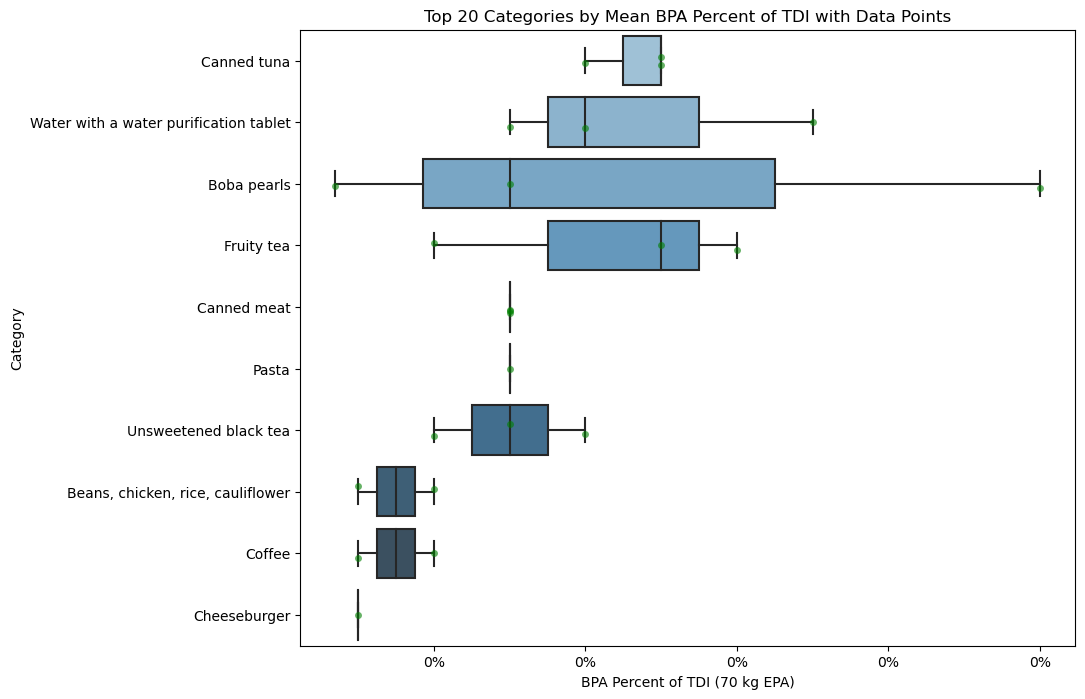

In [100]:
top_categories_count = 10
# Drop rows with NaN values
df_bpa = df_bpa.dropna(subset=['BPA_percent_tdi_70_kg_epa'])

# Calculate the mean of 'BPA_percent_tdi_70_kg_epa' for each 'blinded_name' and get top 20
top_categories = df_bpa.groupby('blinded_name')['BPA_percent_tdi_70_kg_epa'].mean().sort_values(ascending=False).head(top_categories_count).index

# Filter the DataFrame to only include the top 20 categories
df_bpa_top = df_bpa[df_bpa['blinded_name'].isin(top_categories)]

# Calculate the mean for each category and sort them
category_order = df_bpa_top.groupby('blinded_name')['BPA_percent_tdi_70_kg_epa'].mean().sort_values(ascending=False).index

# Create the horizontal boxplot with sorted categories and subdued color palette
plt.figure(figsize=(10, 8))
sns.boxplot(x='BPA_percent_tdi_70_kg_epa', y='blinded_name', data=df_bpa_top, orient='h', order=category_order,
            palette="Blues_d")  # A subdued blue color palette

# Overlay the dots (individual data points) with sorted categories
sns.stripplot(x='BPA_percent_tdi_70_kg_epa', y='blinded_name', data=df_bpa_top, color='green', alpha=0.6, jitter=True, orient='h', order=category_order)

# Add labels and title
plt.xlabel('BPA Percent of TDI (70 kg EPA)')
plt.ylabel('Category')
plt.title('Top 20 Categories by Mean BPA Percent of TDI with Data Points')

# Change x-axis to percentage format
formatter = FuncFormatter(lambda x, _: f'{x:.0f}%')  # Format to show percentage without decimal
plt.gca().xaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

/var/folders/gd/_t59_h597mvghfb9c0dq9zj80000gn/T/ipykernel_32623/3036704294.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bpa_top['BPA_percent_tdi_70_kg_epa'] = df_bpa_top['BPA_percent_tdi_70_kg_epa'] * 100


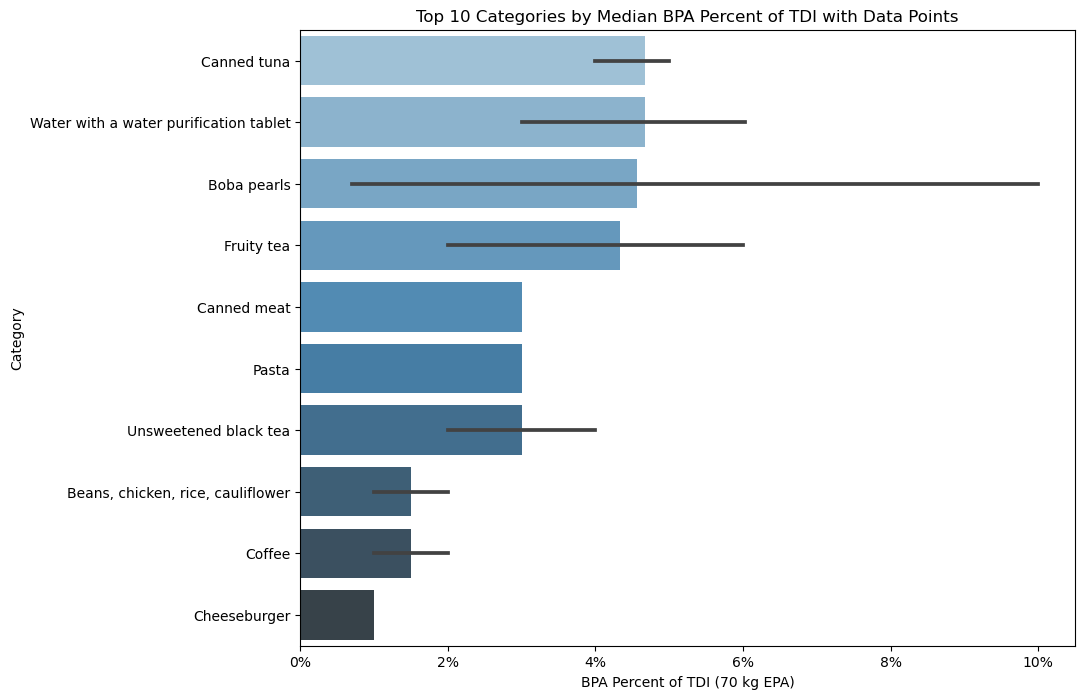

In [101]:
# Calculate the median of 'BPA_percent_tdi_70_kg_epa' for each 'blinded_name' and get top categories
top_categories_count = 10
top_categories = df_bpa.groupby('blinded_name')['BPA_percent_tdi_70_kg_epa'].median().sort_values(ascending=False).head(top_categories_count).index

# Filter the DataFrame to only include the top categories
df_bpa_top = df_bpa[df_bpa['blinded_name'].isin(top_categories)]

# Calculate the median for each category and sort them by the median value
#category_order = df_bpa_top.groupby('blinded_name')['BPA_percent_tdi_70_kg_epa'].median().sort_values(ascending=False).index

# Multiply the values by 100 to convert them to percentages
df_bpa_top['BPA_percent_tdi_70_kg_epa'] = df_bpa_top['BPA_percent_tdi_70_kg_epa'] * 100

# Create the bar chart with sorted categories and subdued color palette
plt.figure(figsize=(10, 8))
sns.barplot(x='BPA_percent_tdi_70_kg_epa', y='blinded_name', data=df_bpa_top, orient='h', order=category_order,
            palette="Blues_d")  # A subdued blue color palette

# Overlay the dots (individual data points) with sorted categories
#sns.stripplot(x='BPA_percent_tdi_70_kg_epa', y='blinded_name', data=df_bpa_top, color='green', alpha=0.6, jitter=False, orient='h', order=category_order)

# Add labels and title
plt.xlabel('BPA Percent of TDI (70 kg EPA)')
plt.ylabel('Category')
plt.title('Top 10 Categories by Median BPA Percent of TDI with Data Points')

# Change x-axis to percentage format
formatter = FuncFormatter(lambda x, _: f'{x:.0f}%')  # Format to show percentage without decimal
plt.gca().xaxis.set_major_formatter(formatter)

# Show the plot
plt.show()


In [102]:
 df[df['blinded_name'] == 'Boba pearls'].BPA_percent_tdi_70_kg_efsa

51      1737.1
115    32571.4
307     6514.3
Name: BPA_percent_tdi_70_kg_efsa, dtype: object

In [103]:
 df[df['blinded_name'] == 'Boba pearls'].BPA_percent_tdi_70_kg_epa

51     0.007
115      0.1
307     0.03
Name: BPA_percent_tdi_70_kg_epa, dtype: object

/Users/williamvanbuskirk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/williamvanbuskirk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/williamvanbuskirk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


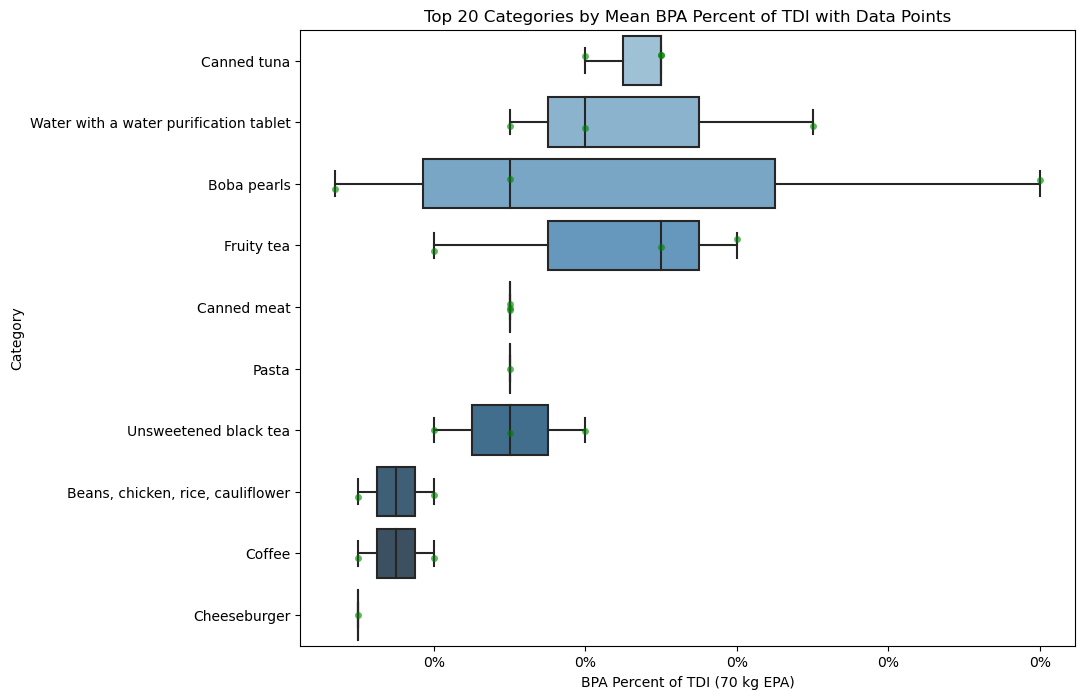

In [104]:
top_categories_count = 10
# Drop rows with NaN values
df_bpa = df_bpa.dropna(subset=['BPA_percent_tdi_70_kg_epa'])

# Calculate the mean of 'BPA_percent_tdi_70_kg_epa' for each 'blinded_name' and get top 20
top_categories = df_bpa.groupby('blinded_name')['BPA_percent_tdi_70_kg_epa'].mean().sort_values(ascending=False).head(top_categories_count).index

# Filter the DataFrame to only include the top 20 categories
df_bpa_top = df_bpa[df_bpa['blinded_name'].isin(top_categories)]

# Calculate the mean for each category and sort them
category_order = df_bpa_top.groupby('blinded_name')['BPA_percent_tdi_70_kg_epa'].mean().sort_values(ascending=False).index

# Create the horizontal boxplot with sorted categories and subdued color palette
plt.figure(figsize=(10, 8))
sns.boxplot(x='BPA_percent_tdi_70_kg_epa', y='blinded_name', data=df_bpa_top, orient='h', order=category_order,
            palette="Blues_d")  # A subdued blue color palette

# Overlay the dots (individual data points) with sorted categories
sns.stripplot(x='BPA_percent_tdi_70_kg_epa', y='blinded_name', data=df_bpa_top, color='green', alpha=0.6, jitter=True, orient='h', order=category_order)

# Add labels and title
plt.xlabel('BPA Percent of TDI (70 kg EPA)')
plt.ylabel('Category')
plt.title('Top 20 Categories by Mean BPA Percent of TDI with Data Points')

# Change x-axis to percentage format
formatter = FuncFormatter(lambda x, _: f'{x:.0f}%')  # Format to show percentage without decimal
plt.gca().xaxis.set_major_formatter(formatter)

# Show the plot
plt.show()